# 📊 Dataset Information

**Note:** The dataset for this project is **not included in this repository** to keep the repository lightweight.  

You can download the dataset from **Kaggle** using the link below:  

[Download The Brasilia Air Quality Dataset](https://www.kaggle.com/datasets/youssefelebiary/global-air-quality-2025-6-cities)  

Please make sure to place the downloaded CSV file in the same directory as this notebook before running any code.

# Importing

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

/kaggle/input/global-air-quality-2025-6-cities/Cairo_Air_Quality.csv
/kaggle/input/global-air-quality-2025-6-cities/Air_Quality.csv
/kaggle/input/global-air-quality-2025-6-cities/London_Air_Quality.csv
/kaggle/input/global-air-quality-2025-6-cities/New_York_Air_Quality.csv
/kaggle/input/global-air-quality-2025-6-cities/Dubai_Air_Quality.csv
/kaggle/input/global-air-quality-2025-6-cities/Sydney_Air_Quality.csv
/kaggle/input/global-air-quality-2025-6-cities/Brasilia_Air_Quality.csv


## Import CSV And convert to DataFrame

In [2]:
df = pd.read_csv('Air_Quality.csv')

# Preprocessing

## Frist five row

In [3]:
df.head()

,Unnamed: 0,Date,City,CO,NO2,SO2,O3,PM2.5,PM10,AQI
0,0,2025-01-01 00:00:00+00:00,Brasilia,325.0,21.1,2.5,35.0,15.4,15.6,20.483337
1,1,2025-01-01 01:00:00+00:00,Brasilia,369.0,20.8,2.7,35.0,15.1,15.3,20.425000
2,2,2025-01-01 02:00:00+00:00,Brasilia,419.0,20.4,3.0,34.0,15.6,15.8,20.333332
3,3,2025-01-01 03:00:00+00:00,Brasilia,451.0,20.5,3.1,33.0,16.4,16.6,20.258335
4,4,2025-01-01 04:00:00+00:00,Brasilia,458.0,22.1,3.0,29.0,17.7,17.8,20.316668


## last Five row

In [4]:
df.tail()

,Unnamed: 0,Date,City,CO,NO2,SO2,O3,PM2.5,PM10,AQI
8755,8755,2025-12-31 19:00:00+00:00,Brasilia,180.0,1.9,1.5,139.0,3.1,3.1,61.636360
8756,8756,2025-12-31 20:00:00+00:00,Brasilia,191.0,2.9,1.5,133.0,3.2,3.2,60.545456
8757,8757,2025-12-31 21:00:00+00:00,Brasilia,223.0,5.6,1.7,123.0,3.7,3.7,55.333332
8758,8758,2025-12-31 22:00:00+00:00,Brasilia,298.0,11.6,2.2,104.0,6.0,6.0,42.666668
8759,8759,2025-12-31 23:00:00+00:00,Brasilia,396.0,19.3,2.9,80.0,8.5,8.5,32.000000


## Shape of our dataset

In [5]:
df.shape

(8760, 10)

## List out all columns

In [6]:
df.columns

Index(['Unnamed: 0', 'Date', 'City', 'CO', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10',
       'AQI'],
      dtype='object')

## Datatype of each columns

In [7]:
df.dtypes

Unnamed: 0      int64
Date           object
City           object
CO            float64
NO2           float64
SO2           float64
O3            float64
PM2.5         float64
PM10          float64
AQI           float64
dtype: object

## Information of all Columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8760 non-null   int64  
 1   Date        8760 non-null   object 
 2   City        8760 non-null   object 
 3   CO          8760 non-null   float64
 4   NO2         8760 non-null   float64
 5   SO2         8760 non-null   float64
 6   O3          8760 non-null   float64
 7   PM2.5       8760 non-null   float64
 8   PM10        8760 non-null   float64
 9   AQI         8760 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 684.5+ KB


## Check Null Value

In [9]:
df.isnull().sum()

Unnamed: 0    0
Date          0
City          0
CO            0
NO2           0
SO2           0
O3            0
PM2.5         0
PM10          0
AQI           0
dtype: int64

## Check Dupicate Value

In [10]:
df.duplicated().sum()

0

## Summary

In [11]:
df.describe()

,Unnamed: 0,CO,NO2,SO2,O3,PM2.5,PM10,AQI
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,4379.500000,226.474658,9.506918,1.685936,67.904566,6.301655,6.577808,28.700643
std,2528.938512,111.771706,9.702633,0.879948,28.416922,4.550559,4.592079,11.087385
min,0.000000,87.000000,0.000000,0.300000,0.000000,0.000000,0.000000,7.600000
25%,2189.750000,156.000000,2.600000,1.000000,46.000000,3.100000,3.400000,20.135417
50%,4379.500000,201.000000,6.400000,1.500000,67.000000,5.000000,5.400000,27.200000
75%,6569.250000,258.000000,12.700000,2.200000,88.000000,8.000000,8.300000,35.200000
max,8759.000000,1203.000000,68.900000,6.000000,162.000000,34.200000,34.300000,65.818184


# EDA

In [12]:
def show_fig():
    plt.tight_layout()
    plt.show()

plot_no = 1

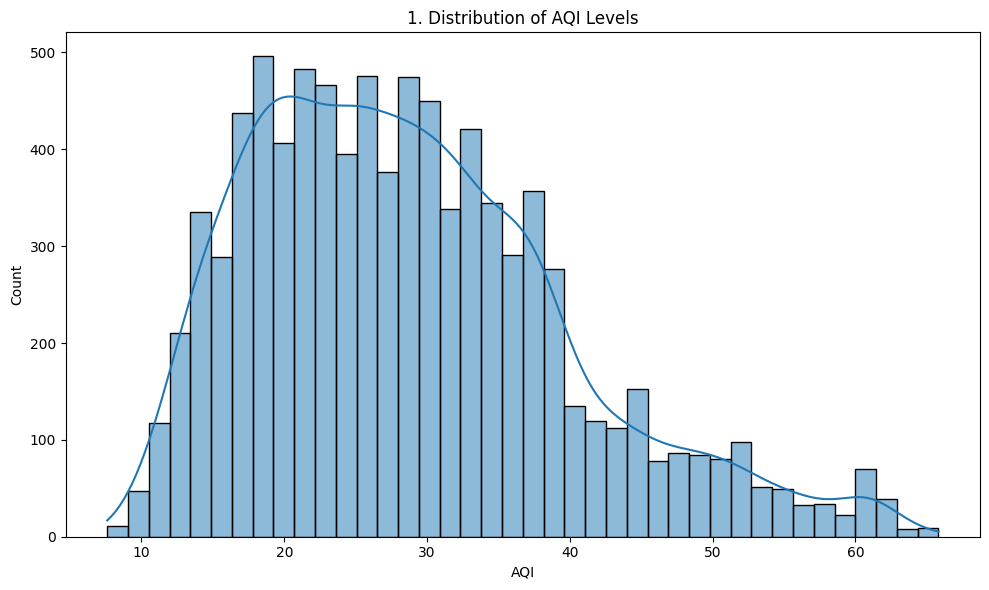

In [13]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['AQI'], kde=True)
plt.title(f'{plot_no}. Distribution of AQI Levels')
show_fig()
plot_no += 1


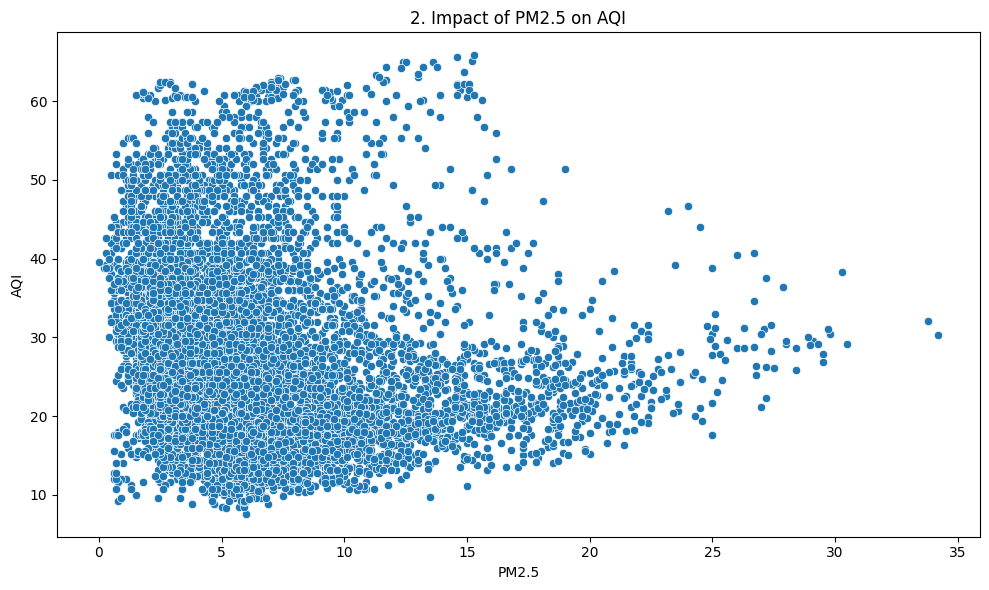

In [14]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='PM2.5', y='AQI')
plt.title(f'{plot_no}. Impact of PM2.5 on AQI')
show_fig()
plot_no += 1


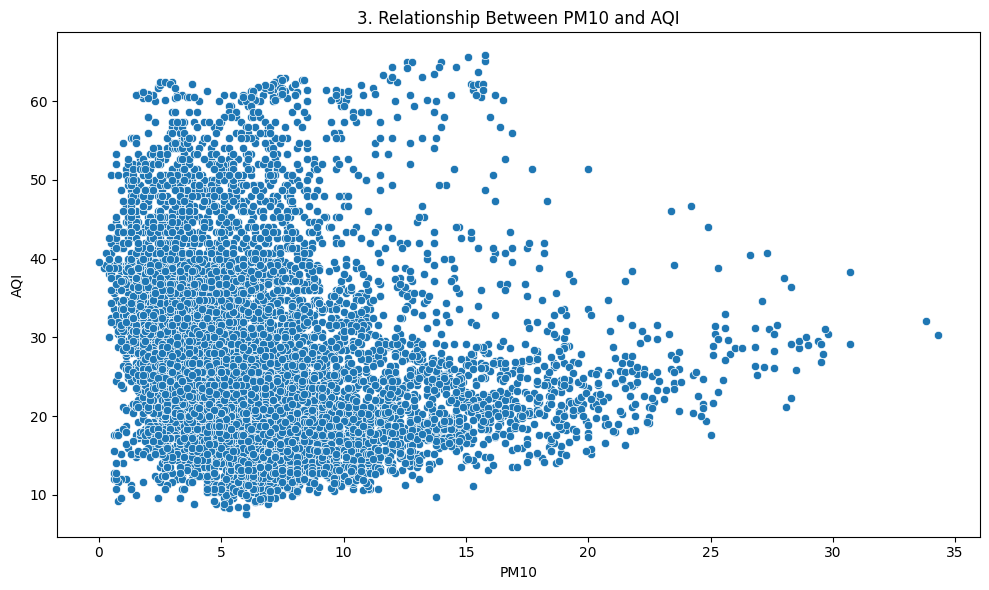

In [15]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='PM10', y='AQI')
plt.title(f'{plot_no}. Relationship Between PM10 and AQI')
show_fig()
plot_no += 1


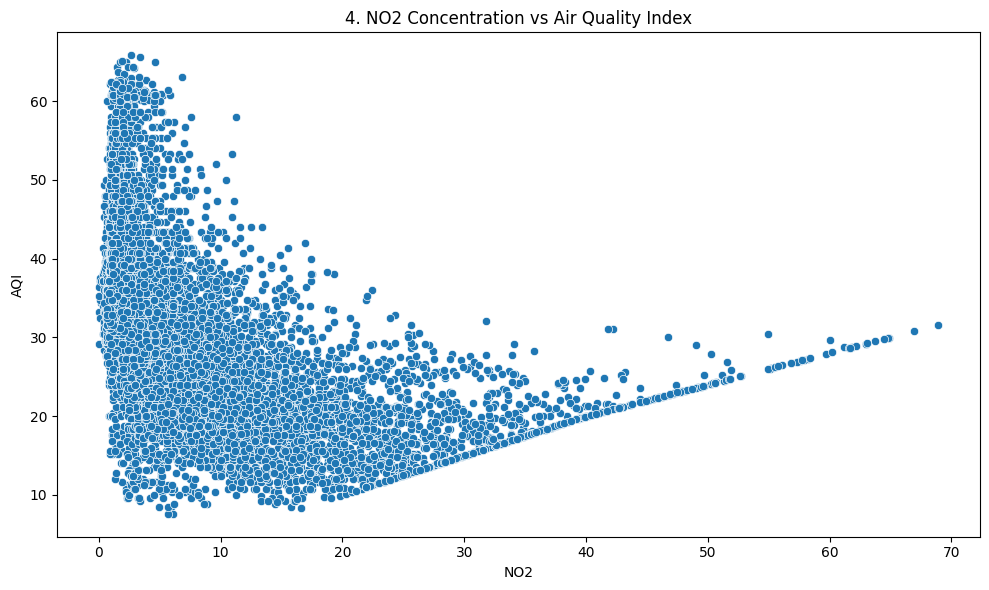

In [16]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='NO2', y='AQI')
plt.title(f'{plot_no}. NO2 Concentration vs Air Quality Index')
show_fig()
plot_no += 1


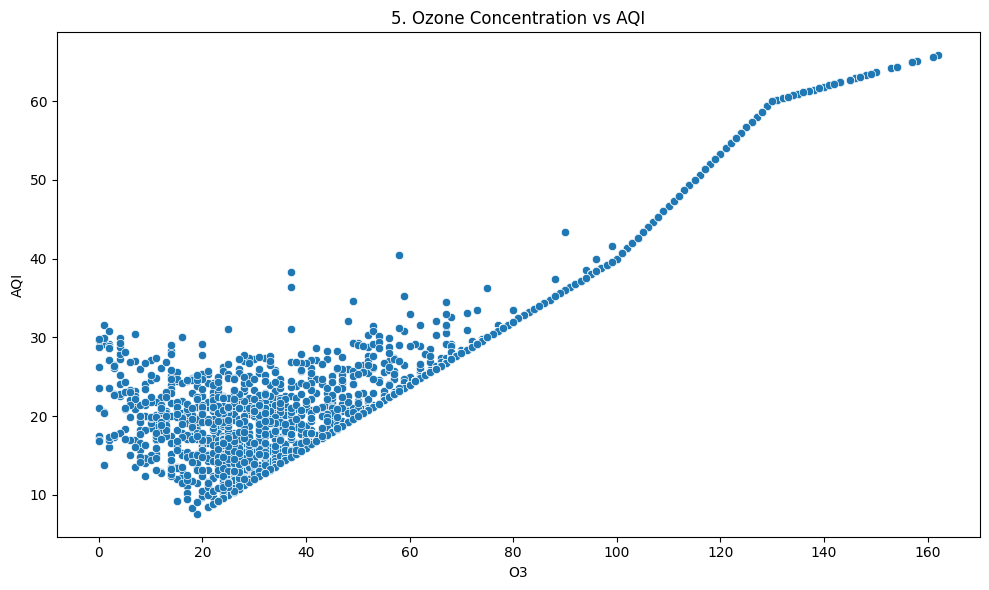

In [17]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='O3', y='AQI')
plt.title(f'{plot_no}. Ozone Concentration vs AQI')
show_fig()
plot_no += 1


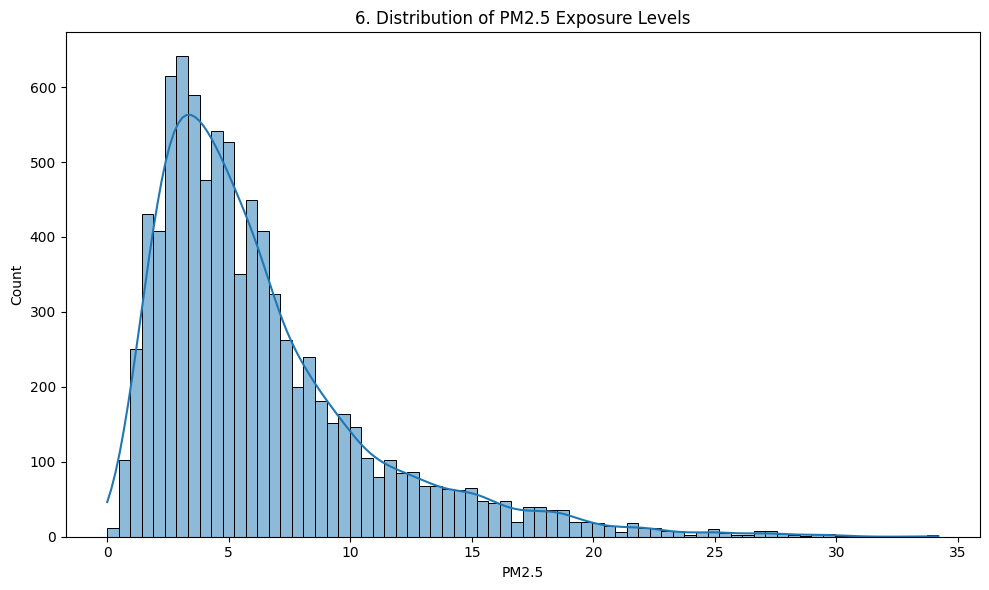

In [18]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['PM2.5'], kde=True)
plt.title(f'{plot_no}. Distribution of PM2.5 Exposure Levels')
show_fig()
plot_no += 1


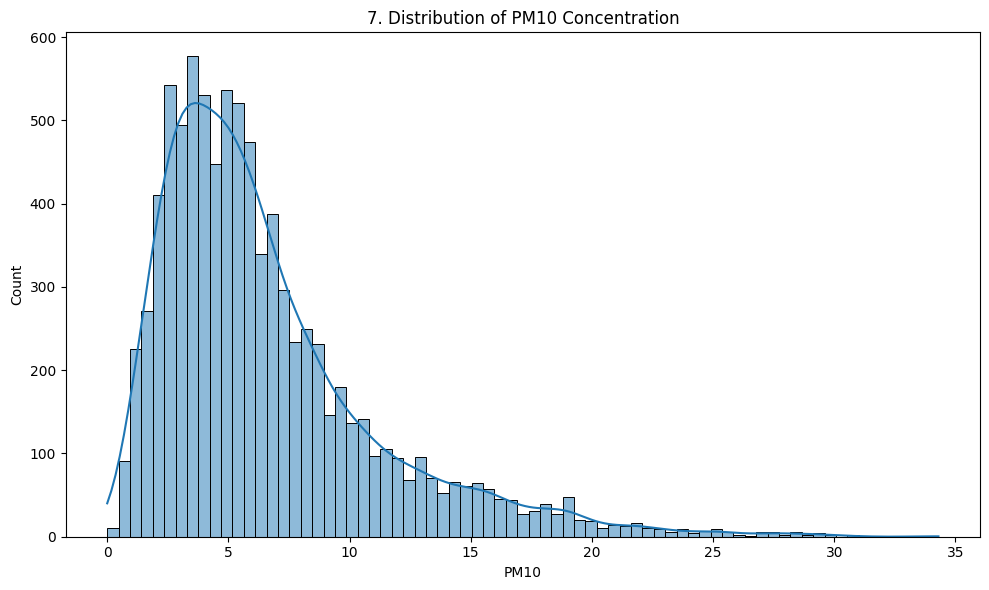

In [19]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['PM10'], kde=True)
plt.title(f'{plot_no}. Distribution of PM10 Concentration')
show_fig()
plot_no += 1


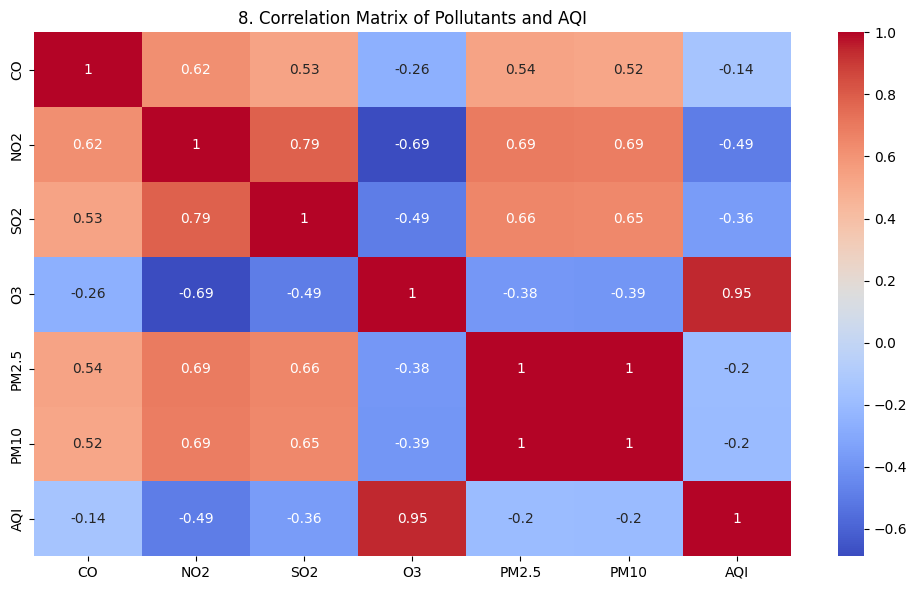

In [20]:
fig = plt.figure(figsize=(10,6))
sns.heatmap(df[['CO','NO2','SO2','O3','PM2.5','PM10','AQI']].corr(), annot=True, cmap='coolwarm')
plt.title(f'{plot_no}. Correlation Matrix of Pollutants and AQI')
show_fig()
plot_no += 1


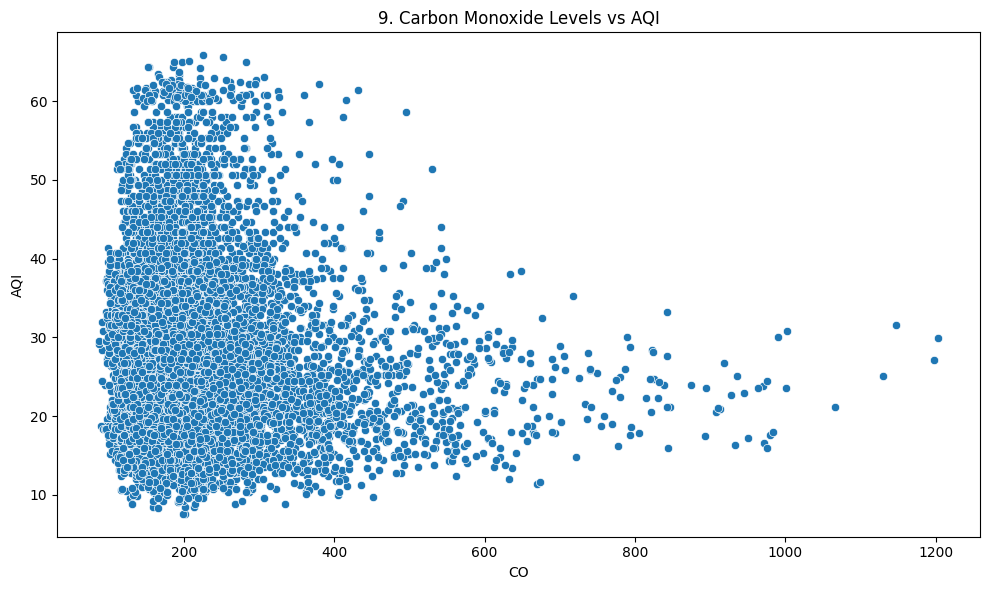

In [21]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='CO', y='AQI')
plt.title(f'{plot_no}. Carbon Monoxide Levels vs AQI')
show_fig()
plot_no += 1


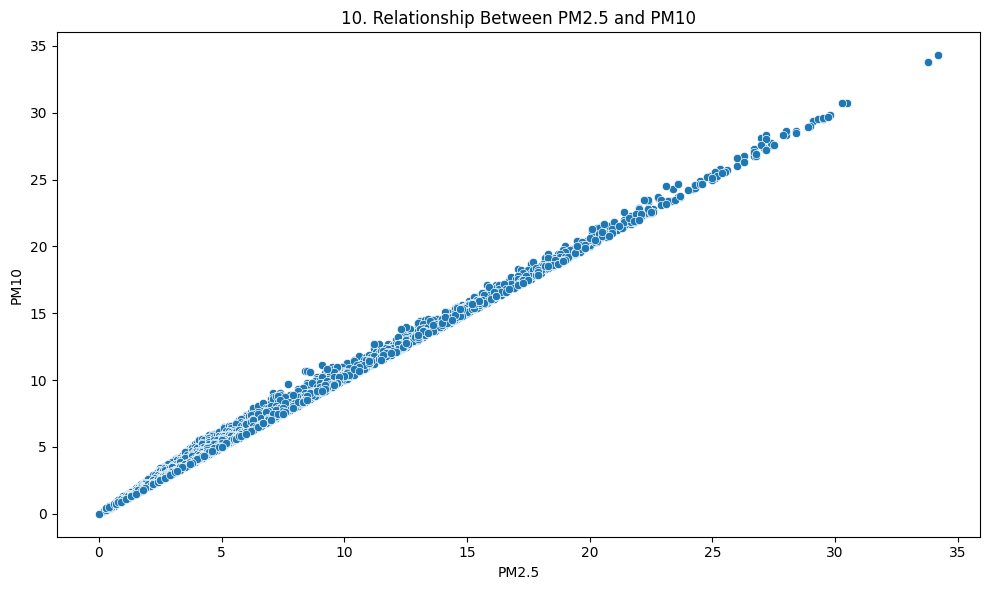

In [22]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='PM2.5', y='PM10')
plt.title(f'{plot_no}. Relationship Between PM2.5 and PM10')
show_fig()
plot_no += 1


# Model Training

## Select feature and target

In [23]:
X = df[['PM2.5']]
y = df['PM10']

## Split data into training and testing sets

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Initialize the supervised model

In [25]:
model = LinearRegression()

## Train the model on training data

In [26]:
model.fit(X_train, y_train)

LinearRegression()

## Make predictions on test data

In [27]:
y_pred = model.predict(X_test)

## Evaluate model performance

In [28]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

## Print evaluation results

In [29]:
print("Model Performance Metrics:")
print(f"MAE  : {mae}")
print(f"RMSE : {rmse}")
print(f"R²   : {r2}")

Model Performance Metrics:
MAE  : 0.21090144979092357
RMSE : 0.27791139205304843
R²   : 0.9963723229591707


## Actual vs Predicted PM10 (Regression Diagnostic Plot)

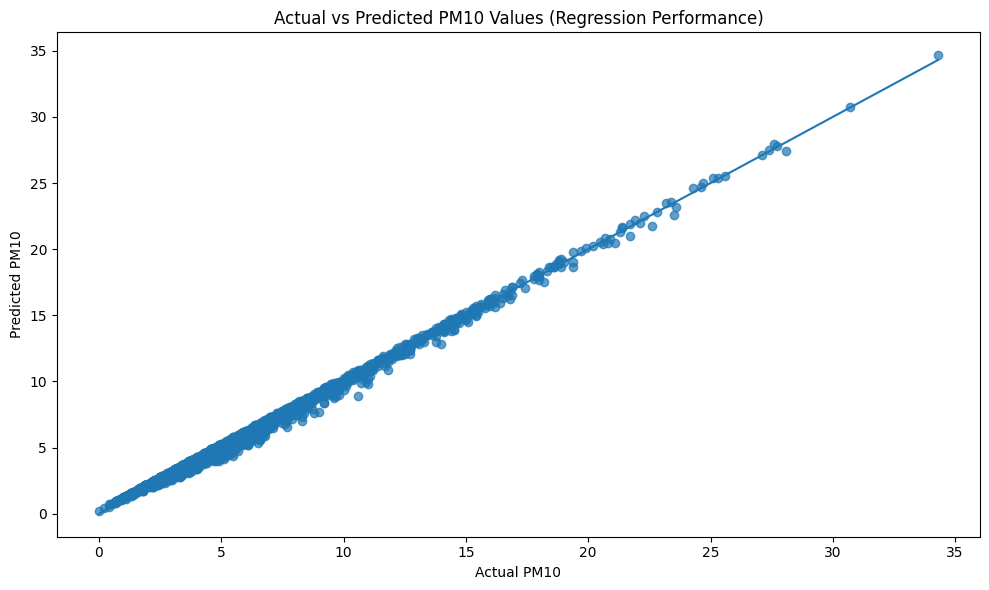

In [30]:
fig = plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()])
plt.xlabel("Actual PM10")
plt.ylabel("Predicted PM10")
plt.title("Actual vs Predicted PM10 Values (Regression Performance)")
plt.tight_layout()
plt.show()